# Overfitting and Local Ricci Evolution Coefficients

In this notebook, we evaluate the evolution of the local Ricci evolution coefficients during training of feed-forward neural networks. We begin by importing the necessary packages. 

In [41]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import torch
import os
import sys

sys.path.append(os.path.abspath('..'))
from neural_networks import DNN
from ricci_coefficients import Ricci_Coefficients
from helpers import train_model_with_ricci_coefs
from datasets import DatasetFactory

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

num_iterations = 3      # Number of iterations used for averaging results

Using mps device


# 1. MNIST 1 vs. 7

In [12]:
# Load datasets
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7))

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for _ in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    # Train model and compute local Ricci evolution coefficients every 10 epochs (Using approximation of Ollivier-Ricci curvature; for Ollivier-Ricci curvature use 'Ollivier-Ricci' and for augmented Forman-Ricci curvature use 'Augmented-Forman-Ricci')
    train_accuracies_MNIST_17, test_accuracies_MNIST_17, ricci_coeficients_MNIST_17 = train_model_with_ricci_coefs(
        epochs=60,
        model=model,
        X_train=X_train_MNIST_17,
        y_train=y_train_MNIST_17,
        X_test=X_test_MNIST_17,
        y_test=y_test_MNIST_17,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_MNIST_17)
    test_accs.append(test_accuracies_MNIST_17)
    ricci_coefs.append(ricci_coeficients_MNIST_17)

# Calculate overall statistics
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanstd(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).mean(axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

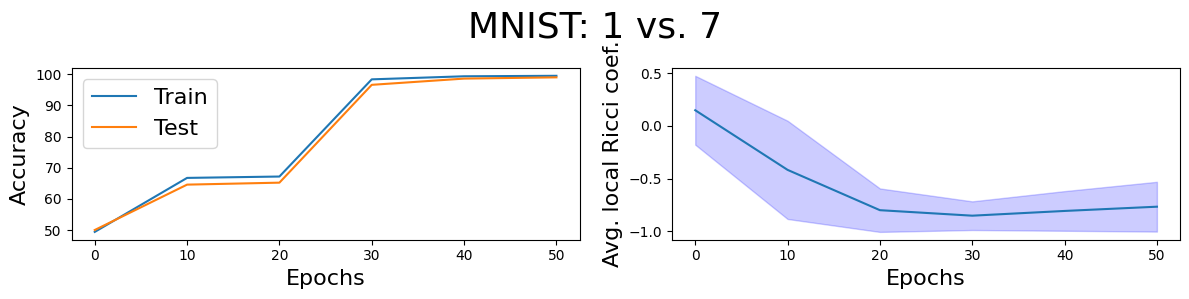

In [13]:
# Plot results
fig = plt.figure(figsize=(12, 3))
fig.suptitle('MNIST: 1 vs. 7', fontsize=26)

# Accuracy plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs)), train_accs, label="Train")
ax1.plot(10 * np.arange(len(test_accs)), test_accs, label="Test")
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

# Local Ricci evolution coefficient plot
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs)
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs - std_ricci_coefs, mean_ricci_coefs + std_ricci_coefs, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

fig.tight_layout()

# 2. MNIST 6 vs. 9

In [14]:
# Load datasets
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9))

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for _ in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)

    # Train model and compute local Ricci evolution coefficients every 10 epochs
    train_accuracies_MNIST_69, test_accuracies_MNIST_69, ricci_coeficients_MNIST_69 = train_model_with_ricci_coefs(
        epochs=60,
        model=model,
        X_train=X_train_MNIST_69,
        y_train=y_train_MNIST_69,
        X_test=X_test_MNIST_69,
        y_test=y_test_MNIST_69,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_MNIST_69)
    test_accs.append(test_accuracies_MNIST_69)
    ricci_coefs.append(ricci_coeficients_MNIST_69)

# Calculate overall statistics
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanstd(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).mean(axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

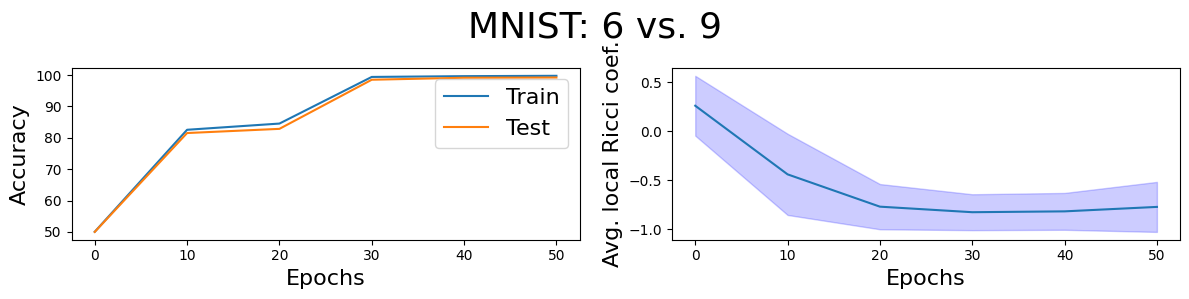

In [ ]:
fig = plt.figure(figsize=(12, 3))
fig.suptitle('MNIST: 6 vs. 9', fontsize=26)

# Accuracy plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs)), train_accs, label="Train")
ax1.plot(10 * np.arange(len(test_accs)), test_accs, label="Test")
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

# Local Ricci evolution coefficient plot
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs)
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs - std_ricci_coefs, mean_ricci_coefs + std_ricci_coefs, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

fig.tight_layout()

# 3. Fashion-MNIST Shoes

In [38]:
# Load datasets
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST(classes=(5,7), device='cpu')

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for _ in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    # Train model and compute local Ricci evolution coefficients every 10 epochs
    train_accuracies_fMNIST_shoes, test_accuracies_fMNIST_shoes, ricci_coeficients_fMNIST_shoes = train_model_with_ricci_coefs(
        epochs=100,
        model=model,
        X_train=X_train_fMNIST_shoes,
        y_train=y_train_fMNIST_shoes,
        X_test=X_test_fMNIST_shoes,
        y_test=y_test_fMNIST_shoes,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_fMNIST_shoes)
    test_accs.append(test_accuracies_fMNIST_shoes)
    ricci_coefs.append(ricci_coeficients_fMNIST_shoes)

# Calculate overall statistics
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanstd(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).mean(axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

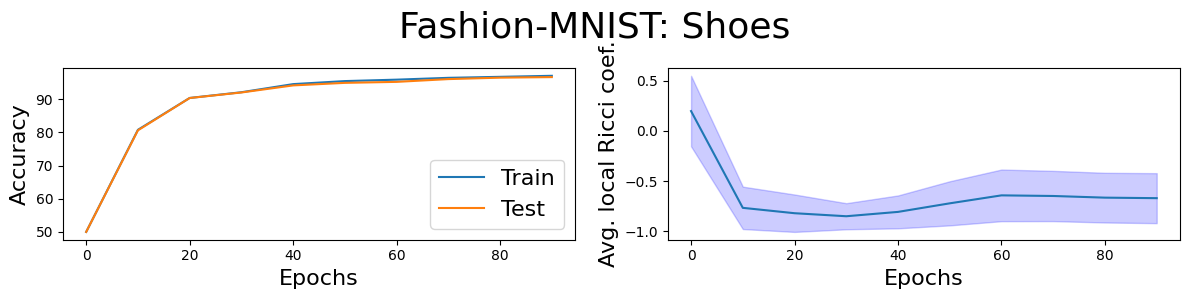

In [39]:
fig = plt.figure(figsize=(12, 3))
fig.suptitle('Fashion-MNIST: Shoes', fontsize=26)

# Accuracy plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs)), train_accs, label="Train")
ax1.plot(10 * np.arange(len(test_accs)), test_accs, label="Test")
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

# Local Ricci evolution coefficient plot
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs)
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs - std_ricci_coefs, mean_ricci_coefs + std_ricci_coefs, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

fig.tight_layout()

# Fashion-MNIST Apperal

In [47]:
# Load datasets
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device='cpu')

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for _ in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
    # Train model and compute local Ricci evolution coefficients every 10 epochs
    train_accuracies_fMNIST_apperal, test_accuracies_fMNIST_apperal, ricci_coeficients_fMNIST_apperal = train_model_with_ricci_coefs(
        epochs=100,
        model=model,
        X_train=X_train_fMNIST_apperal,
        y_train=y_train_fMNIST_apperal,
        X_test=X_test_fMNIST_apperal,
        y_test=y_test_fMNIST_apperal,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_fMNIST_apperal)
    test_accs.append(test_accuracies_fMNIST_apperal)
    ricci_coefs.append(ricci_coeficients_fMNIST_apperal)

# Calculate overall statistics
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanstd(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).mean(axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

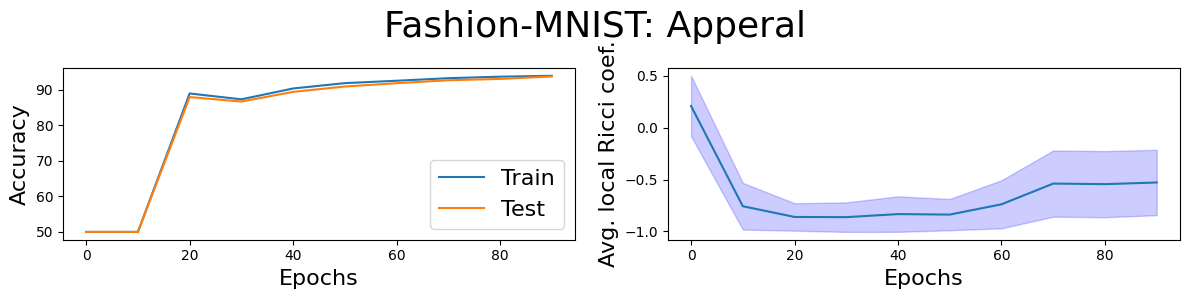

In [49]:
fig = plt.figure(figsize=(12, 3))
fig.suptitle('Fashion-MNIST: Apperal', fontsize=26)

# Accuracy plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs)), train_accs, label="Train")
ax1.plot(10 * np.arange(len(test_accs)), test_accs, label="Test")
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

# Local Ricci evolution coefficient plot
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs)
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs - std_ricci_coefs, mean_ricci_coefs + std_ricci_coefs, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

fig.tight_layout()

# CIFAR-10

In [29]:
# Load dataset
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1), device=device)

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for _ in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=32*32*3, hidden_units=100, depth=7, vision_model=True).to(device=device)
    # Train model and compute local Ricci evolution coefficients every 10 epochs
    train_accuracies_CIFAR, test_accuracies_CIFAR, ricci_coeficients_CIFAR = train_model_with_ricci_coefs(
        epochs=500,
        model=model,
        X_train=X_train_CIFAR,
        y_train=y_train_CIFAR,
        X_test=X_test_CIFAR,
        y_test=y_test_CIFAR,
        calculate_ricci_coefs_every=50,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_CIFAR)
    test_accs.append(test_accuracies_CIFAR)
    ricci_coefs.append(ricci_coeficients_CIFAR)

# Calculate overall statistics
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanstd(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).mean(axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

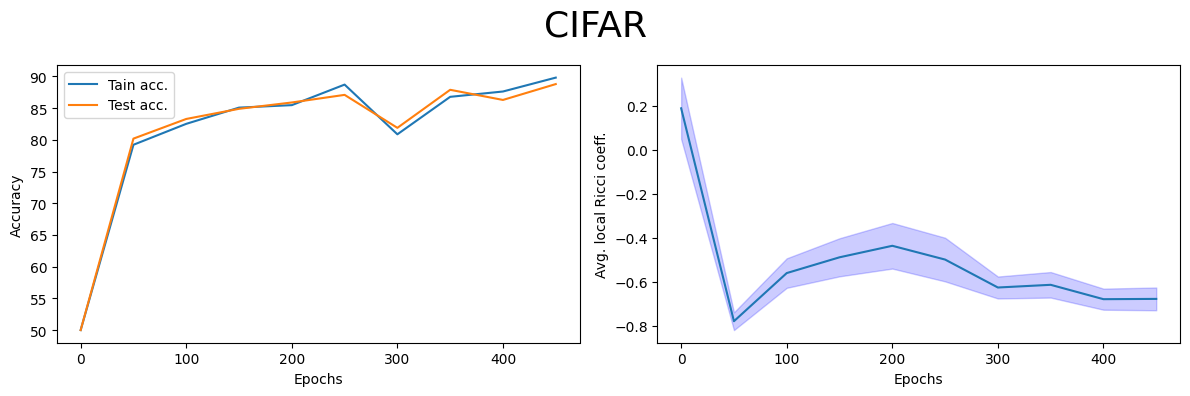

In [32]:
fig = plt.figure(figsize=(12,4))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(50 * np.arange(len(train_accuracies_CIFAR)), train_accuracies_CIFAR, label="Tain acc.")
ax1.plot(50 * np.arange(len(test_accuracies_CIFAR)), test_accuracies_CIFAR, label="Test acc.")
# ax1.axvline(x=20, color='gray', linestyle='--')
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

mean = np.array([np.nanmean(ricci_coeficients_CIFAR[i]) for i in range(len(ricci_coeficients_CIFAR))])
var = np.array([np.nanvar(ricci_coeficients_CIFAR[i]) for i in range(len(ricci_coeficients_CIFAR))])
ax2 = fig.add_subplot(122)
ax2.plot(50 * np.arange(len(ricci_coeficients_CIFAR)), mean)
ax2.fill_between(50 * np.arange(len(ricci_coeficients_CIFAR)), mean - var, mean + var, color='blue', alpha=0.2)
# ax2.axvline(x=20, color='gray', linestyle='--')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Avg. local Ricci coeff.")

fig.suptitle('CIFAR', fontsize=26)
fig.tight_layout()